# Medical Expense Prediction

In [47]:
# importing all useful libraries
import numpy as np #linear algebra
import pandas as pd #data processing,csv file i/o
#this line prepares IPython for working with matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt #plotting
import seaborn as sns #data visualization



In [48]:
# reading the input csv's isnsurance and customer and merging it into single dataframe insurance_data

customer = pd.read_csv('C:\\Users\\hrsht\\Desktop\\Project - Medical Expense Prediction\\Customer.csv')
insurance = pd.read_csv('C:\\Users\\hrsht\\Desktop\\Project - Medical Expense Prediction\\insurance.csv')



In [49]:
customer.head(5)

,policyid,First Name,Last Name,age,sex,bmi,children,smoker,diabetes,hypertension,stroke,heart disease
0,7893718,Mary,Smith,19,female,27.9,0,yes,0,0,0,1
1,7893719,John,Federick,18,male,33.8,1,no,0,0,0,0
2,7893720,Taylor,Williams,28,male,33.0,3,no,0,0,0,0
3,7893721,Matt,Brown,33,male,22.7,0,no,0,0,0,0
4,7893722,Daniel,Jones,32,male,28.9,0,no,0,1,0,1


In [50]:
insurance.head(5)

,policyid,region,expenses
0,7893718,southwest,16884.92
1,7893719,southeast,1725.55
2,7893720,southeast,4449.46
3,7893721,northwest,21984.47
4,7893722,northwest,3866.86


In [51]:
insurance_data = customer.merge(insurance, on='policyid')

In [52]:
# provides information of the columns present in dataframe
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 14 columns):
policyid         1338 non-null int64
First Name       1338 non-null object
Last Name        1338 non-null object
age              1338 non-null int64
sex              1338 non-null object
bmi              1332 non-null float64
children         1338 non-null int64
smoker           1338 non-null object
diabetes         1338 non-null int64
hypertension     1338 non-null int64
stroke           1338 non-null int64
heart disease    1338 non-null int64
region           1338 non-null object
expenses         1338 non-null float64
dtypes: float64(2), int64(7), object(5)
memory usage: 156.8+ KB


In [53]:
# provides snapshot of insurance
insurance_data.head(5)

,policyid,First Name,Last Name,age,sex,bmi,children,smoker,diabetes,hypertension,stroke,heart disease,region,expenses
0,7893718,Mary,Smith,19,female,27.9,0,yes,0,0,0,1,southwest,16884.92
1,7893719,John,Federick,18,male,33.8,1,no,0,0,0,0,southeast,1725.55
2,7893720,Taylor,Williams,28,male,33.0,3,no,0,0,0,0,southeast,4449.46
3,7893721,Matt,Brown,33,male,22.7,0,no,0,0,0,0,northwest,21984.47
4,7893722,Daniel,Jones,32,male,28.9,0,no,0,1,0,1,northwest,3866.86


In [54]:
insurance_data.describe()

,policyid,age,bmi,children,diabetes,hypertension,stroke,heart disease,expenses
count,1.338000e+03,1338.000000,1332.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,7.894386e+06,39.207025,30.447673,1.094918,0.082212,0.073244,0.014948,0.035127,13270.422414
std,3.863916e+02,14.049960,5.780594,1.205493,0.274791,0.260633,0.121389,0.184170,12110.011240
min,7.893718e+06,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,7.894052e+06,27.000000,26.300000,0.000000,0.000000,0.000000,0.000000,0.000000,4740.287500
50%,7.894386e+06,39.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,9382.030000
75%,7.894721e+06,51.000000,34.400000,2.000000,0.000000,0.000000,0.000000,0.000000,16639.915000
max,7.895055e+06,64.000000,45.900000,5.000000,1.000000,1.000000,1.000000,1.000000,63770.430000


# Data Cleaning

In [55]:
# Dropping columns from dataframe which are not required for our analysis
insurance_data = insurance_data.drop(['policyid','First Name', 'Last Name', 'diabetes', 'hypertension','stroke','heart disease'], axis=1)  
 

In [56]:
insurance_data.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [57]:
# check for duplicates
insurance_data.duplicated().sum()

1

In [58]:
#remove duplicates if any
insurance_data = insurance_data.drop_duplicates()

In [59]:
# verify all duplicates are removed
insurance_data.duplicated().sum()

0

In [60]:
# identify the number of missing values for each column in the dataframe
count_nan = insurance_data.isnull().sum()
print(count_nan[count_nan > 0]) 

bmi    6
dtype: int64


In [61]:
# we identified that the missing value is present in bmi column of dataframe, 
#hence we are replacing the NaN with mean value

insurance_data['bmi'].fillna(insurance_data['bmi'].mean(), inplace = True) 

In [62]:
# verifing that the missing values are no longer present

count_nan = insurance_data.isnull().sum() 
print(count_nan[count_nan > 0]) 

Series([], dtype: int64)


In [63]:
# Checking the pattern present in dataframe: the count of male and female in our dataset is almost equal
insurance_data["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

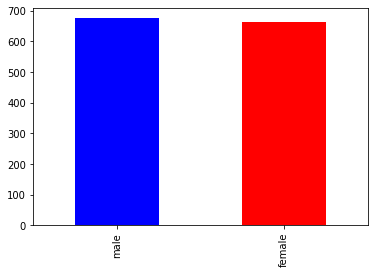

In [64]:
# Bar graph plotting
insurance_data['sex'].value_counts().plot(kind='bar',color=('b', 'r'));

In [65]:
# Checking the pattern present in dataframe: the count of users in each region is almost same
insurance_data["region"].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

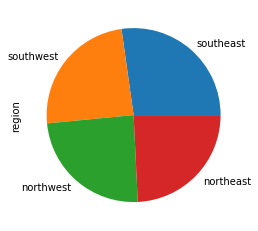

In [66]:
# plotting of column region
#insurance_data['region'].value_counts().plot(kind='bar');
insurance_data.region.value_counts().plot(kind="pie")

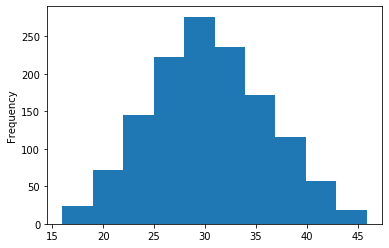

In [67]:
#Plotting BMI
insurance_data.bmi.plot(kind="hist")

Text(0, 0.5, 'count')

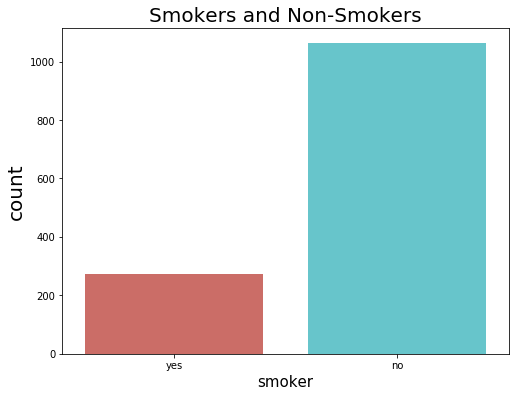

In [68]:
plt.figure(figsize = (8,6))
g = sns.countplot(x="smoker",data=insurance_data,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=20)
g.set_xlabel("smoker", fontsize=15)
g.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

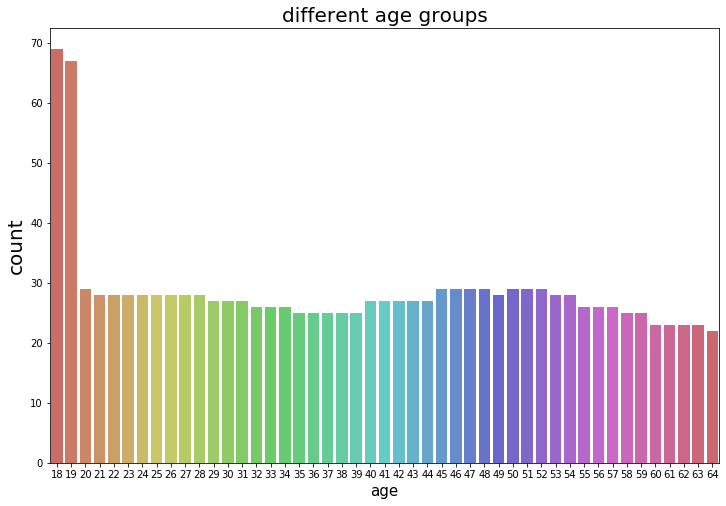

In [69]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="age",data=insurance_data,palette='hls')
g.set_title("different age groups", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

# Data Transformation and Visualization

In [70]:
# Transform categorical data into numerical data
insurance_data["sex"] = insurance_data.sex.replace({'male':1,'female':2})
insurance_data["smoker"] = insurance_data.smoker.replace({'yes':1,'no':0})
insurance_data["region"] = insurance_data.region.replace({'southeast':1,'southwest':2,'northwest':3,'northeast':4})
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
age         1337 non-null int64
sex         1337 non-null int64
bmi         1337 non-null float64
children    1337 non-null int64
smoker      1337 non-null int64
region      1337 non-null int64
expenses    1337 non-null float64
dtypes: float64(2), int64(5)
memory usage: 123.6 KB


In [71]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,2,27.9,0,1,2,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


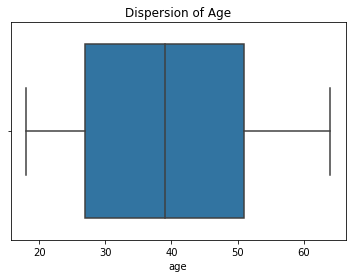

In [72]:
# No outlier in age column.
ax = sns.boxplot(insurance_data['age'])
ax.set_title('Dispersion of Age')
plt.show(ax)

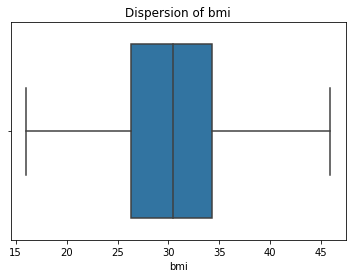

In [73]:
#To ensure there are no outliers for bmi by box plot. there are very few bmi values 
ax = sns.boxplot(insurance_data['bmi'])
ax.set_title("Dispersion of bmi")
plt.show(ax)

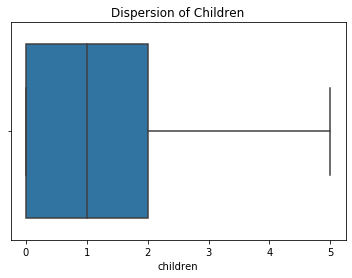

In [74]:
ax = sns.boxplot(insurance_data['children'])
ax.set_title("Dispersion of Children")
plt.show(ax)

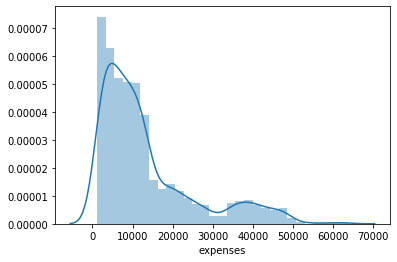

In [75]:
sns.distplot(insurance_data['expenses'])

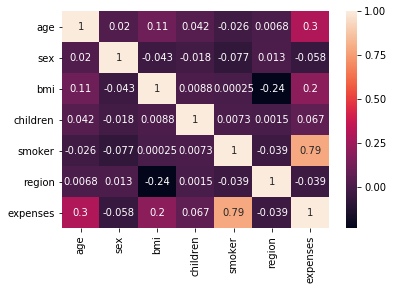

In [76]:
# Calculating correlation
sns.heatmap(insurance_data.corr(),annot = True)
#insurance_data.corr()
#From correlation outputs, we understand that sex and region variables are negatively correlated with expenses.
#So, dropping these variables and making the model.

# Multiple Linear Regression

In [77]:
# Importing Linear regression algorithm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [78]:
#Taking x and y coordinates
Y = insurance_data["expenses"]
x = insurance_data.drop(columns = ["expenses","sex","region"])

In [79]:
#Splitting test and train data
train_x,test_x,train_y,test_y = train_test_split(x,Y,test_size = 0.3,random_state = 42)

In [80]:
train_x.shape

(935, 4)

In [81]:
test_x.shape

(402, 4)

In [82]:
# creating an object and passing test and train datasets
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# calculating intercept
model.intercept_

-12820.13973276139

In [84]:
#Calculating age, BMI, children, smoker coefficients
model.coef_

array([  250.26792929,   354.89690848,   527.01409753, 22822.29316733])

In [85]:
#Based on the output, the intercept value is -12472.897. And the coefficients B1, B2,B3 and B4 
#are 261.835, 333.484, 433.500 and 23626.098 respectively. 
#The regression model can be written, y = -12472.897 + 261.835(age) + 333.484(bmi) + 433.500(children) + 23626.098(smoker)

In [86]:
cdf = pd.DataFrame(model.coef_,train_x.columns,columns = ['Coeff'])
cdf

,Coeff
age,250.267929
bmi,354.896908
children,527.014098
smoker,22822.293167


## Prediction

In [91]:
# Predicting output variable with test and train data
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

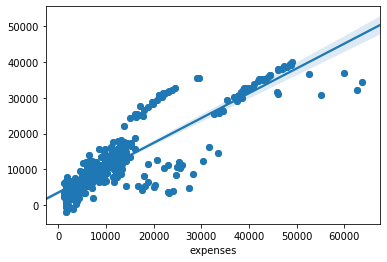

In [92]:
# Plotting scatter plot
plt.scatter(test_y,test_predict)
ax = sns.regplot(test_y,test_predict)
plt.show(ax)

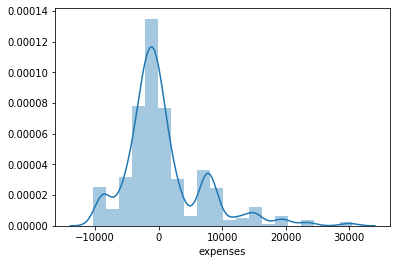

In [93]:
#error graph distribution
sns.distplot((test_y-test_predict),bins = 20)

In [94]:
from sklearn.metrics import r2_score
print("R2 - Train_data :" ,r2_score(train_y,train_predict))
print("R2 - Test_data :" ,r2_score(test_y,test_predict))

R2 - Train_data : 0.7389010596269034
R2 - Test_data : 0.7642605387290626


In [95]:
#Plot to see the actual expenses and predicted expenses from Train data set
#ax = sns.scatterplot(train_y,train_predict)
#ax = sns.regplot(train_y,train_predict)
#ax.set_title("Actual Expenses vs Predicted Expenses")
#plt.xlabel("Actual Expenses")
#plt.ylabel("Predicted Expenses")
#plt.show(ax)

In [96]:
'''
The purposes of this exercise to look into different features to observe their relationship, 
and plot a multiple linear regression based on several features of individual such as age, 
physical/family condition and location against their existing medical expense to be used for 
predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium. 
'''
def calc_insurance(age, bmi,children, smoking):
 y = ((age*model.coef_[0]) + (bmi*model.coef_[1]) + (children*model.coef_[2]) + (smoking*model.coef_[3]) + model.intercept_)
 return y

In [97]:
#predict how much insurance costs from someone who is 19 years old, the value of BMI is 27.9, has no children and is a smoker
print(calc_insurance(19, 27.9,0,1))
print(calc_insurance(18, 33.8,1,0))
print(calc_insurance(28, 33,3,0))


24658.867837716112
4207.212598678443
7480.002559828428
